<a href="https://colab.research.google.com/github/sadoky/inteligencia-_articial_ELECT/blob/main/Proyecto_Final__IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO_FINAL_I.A._(2023)

**LIBRERIAS**

In [ ]:
import numpy as np
np.random.seed(4)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from numpy.matrixlib.defmatrix import concatenate

**CARGA_DE_DATOS**

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


**SET_DE_ENTRENAMIENTO_Y_VALIDACION**

In [ ]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:4000])
set_validacion1 = dataset["Ghi"].iloc[4000:6240]

**ESCALAMIENTO_SET_DE_DATOS(ENTRENAMIENTO)**

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

*Ajustar_datos_de_forma_secuencial*

In [ ]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

*Reestructuracion_de_datos*

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# RED_NEURONAL_RECURRENTE(LSTM,GRU)

*PARAMETROS_DE_LA_RED*

In [ ]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
capas_ocultas= 10

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(GRU(units=capas_ocultas, input_shape=dim_entrada))

In [ ]:
modelo.add(Dense(units=dim_salida))

In [ ]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [ ]:
history=modelo.fit(X_train,Y_train,epochs=8,batch_size=10,verbose=2)


Epoch 1/8
394/394 - 7s - loss: 0.0281 - 7s/epoch - 18ms/step
Epoch 2/8
394/394 - 5s - loss: 0.0022 - 5s/epoch - 12ms/step
Epoch 3/8
394/394 - 5s - loss: 0.0016 - 5s/epoch - 14ms/step
Epoch 4/8
394/394 - 5s - loss: 0.0012 - 5s/epoch - 13ms/step
Epoch 5/8
394/394 - 5s - loss: 0.0010 - 5s/epoch - 13ms/step
Epoch 6/8
394/394 - 6s - loss: 8.6708e-04 - 6s/epoch - 16ms/step
Epoch 7/8
394/394 - 5s - loss: 7.5199e-04 - 5s/epoch - 13ms/step
Epoch 8/8
394/394 - 5s - loss: 6.6431e-04 - 5s/epoch - 12ms/step


# Progreso_de_entrenamiento 

(0.0, 0.007)

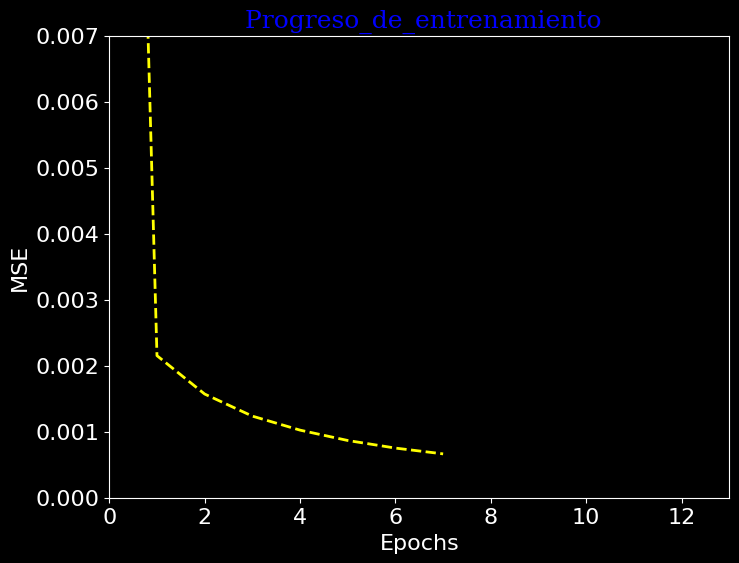

In [ ]:
loss=history.history['loss']
x=np.arange(0,8,1)


font1 = {'family':'serif','color':'blue','size':18}

plt.figure(figsize=(8,6))                      
plt.title(" Progreso_de_entrenamiento",fontdict=font1)
plt.plot(x,loss,'--',linewidth='2',color='yellow')
plt.style.use('dark_background')
plt.rcParams['font.size'] = 16
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.xlim(0,13)
plt.ylim(0,0.007)


**ESCALAMIENTO_SET_DE_DATOS(TEST)**

In [ ]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [ ]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)


# PREDICCIÓN

In [ ]:
prediccion = modelo.predict(x_test)                   #  predicción utilizando el modelo de aprendizaje automático que se ajustó previamente a los datos de entrenamiento.
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)                  # conversion a formato datafream

70/70 [==============================] - 1s 2ms/step


*ENTRENAMIENTO_Y_VALIDACION(GRÁFICA)*

In [ ]:
datos_train=dataset["Ghi"].iloc[0:4000]
datos_val=dataset["Ghi"].iloc[4001:6240]

**REAJUSTE:**  El argumento -1 utilizado en la función reshape significa que se debe inferir la dimensión desconocida basándose en el tamaño de la matriz original y en la dimensión conocida (1 en este caso).

In [ ]:
ceros=np.zeros(4000,int)
pred_new=np.asarray(prediccion2,dtype=np.float64)

pred_new=pred_new.reshape(-1,1)
ceros=ceros.reshape(-1,1)

*Concatenacion_de_los_datos(GRAFICA)*

In [ ]:
lim=np.concatenate((ceros,pred_new))
lim2=pd.DataFrame(lim)
prediccion_final=lim2[4000:]
prediccion_final.columns=['predicción']

# RESULTADOS

Text(0, 0.5, 'Radiación [$W/m^2$]')

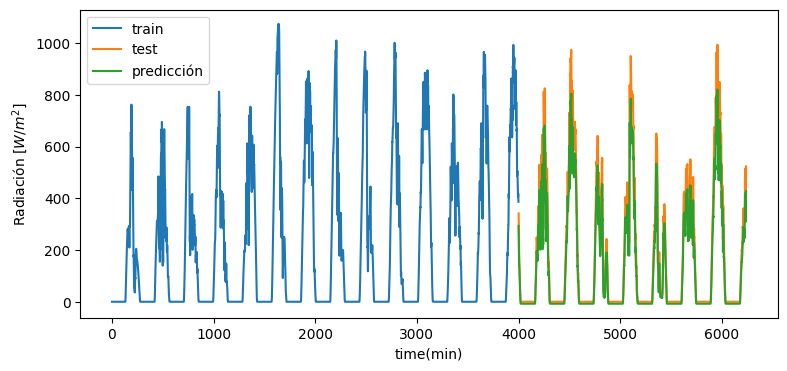

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict")

plt.legend(loc="upper left")
plt.xlabel('time(min)')
plt.ylabel('Radiación [$W/m^2$]')

Text(0, 0.5, 'Radiación [$W/m^2$]')

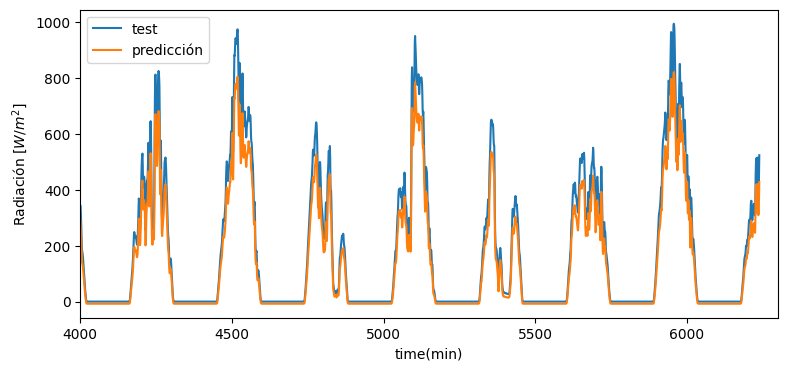

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax, label='predict')
plt.xlim(4000,6300)

plt.legend(loc="upper left")
plt.xlabel('time(min)')
plt.ylabel('Radiación [$W/m^2$]')